## Introduction
The goal of this exercise is to create customer segmentation and analysis for a retail store within a mall, further create an unsupervised machine learning model such as KMeans Clustering to provide insights to the marketing team.

### Steps to follow
<ul>
    <li>Import the libraries</li>
    <li>Clean the data</li>
    <li>Analyze the data</li>
    <li>Develop Model</li>
    <li>Evaluate the Model</li>
</ul>

In [1]:
import numpy as np
import pandas as pd

## Clean the Data

In [2]:
df=pd.read_csv('../input/Mall_Customers.csv')

In [3]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
missing_data=df.isnull()

In [5]:
missing_data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [6]:
df.shape

(200, 5)

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

CustomerID
False    200
Name: CustomerID, dtype: int64

Genre
False    200
Name: Genre, dtype: int64

Age
False    200
Name: Age, dtype: int64

Annual Income (k$)
False    200
Name: Annual Income (k$), dtype: int64

Spending Score (1-100)
False    200
Name: Spending Score (1-100), dtype: int64



#### There are no missing data

In [8]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Analyze the Data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

#### Data types are correct and doesnt require to be updated

In [11]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [12]:
df[['Age', 'Annual Income (k$)']].corr()

,Age,Annual Income (k$)
Age,1.000000,-0.012398
Annual Income (k$),-0.012398,1.000000


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 143.20110044150107)

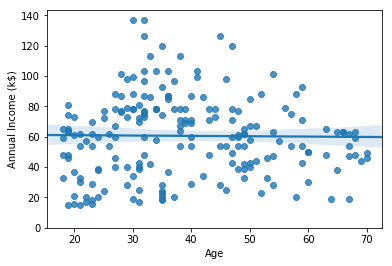

In [13]:
sns.regplot(x='Age', y='Annual Income (k$)', data=df)
plt.ylim(0,)

#### There is a negative weak correlation between Age and Annual Income

In [14]:
df[['Age', 'Spending Score (1-100)']].corr()

,Age,Spending Score (1-100)
Age,1.000000,-0.327227
Spending Score (1-100),-0.327227,1.000000


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 103.98380518763797)

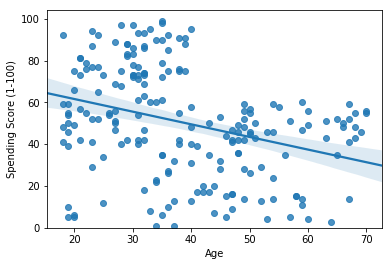

In [15]:
sns.regplot(x='Age', y='Spending Score (1-100)', data=df)
plt.ylim(0,)

#### There is a decent negative correlation between Age and Spending Score

In [16]:
df[['Spending Score (1-100)','Annual Income (k$)']].corr()

,Spending Score (1-100),Annual Income (k$)
Spending Score (1-100),1.000000,0.009903
Annual Income (k$),0.009903,1.000000


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 103.98380518763797)

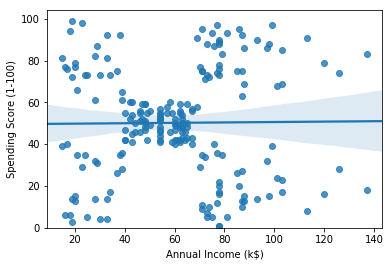

In [17]:
sns.regplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.ylim(0,)

#### There is almost no correlation between Annual Income and Spending Score

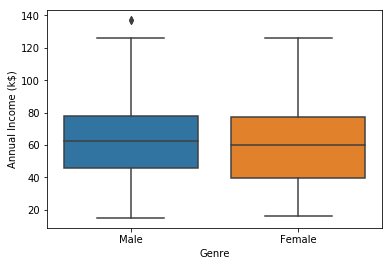

In [18]:
sns.boxplot(x='Genre', y='Annual Income (k$)', data=df)

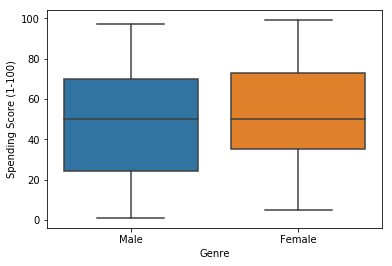

In [19]:
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df)

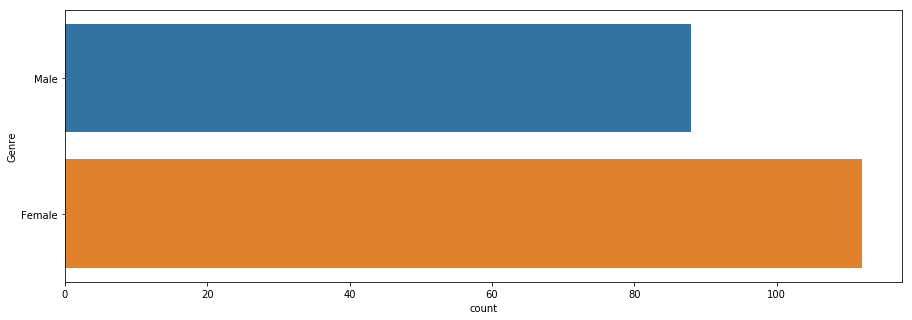

In [20]:
plt.figure(1, figsize=(15,5))
sns.countplot(y='Genre', data=df)
plt.show()

### Conclusion: Important Variables are Age and Spending Score 

## Develop the Model

### Clustering using K-means

In [21]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

In [22]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

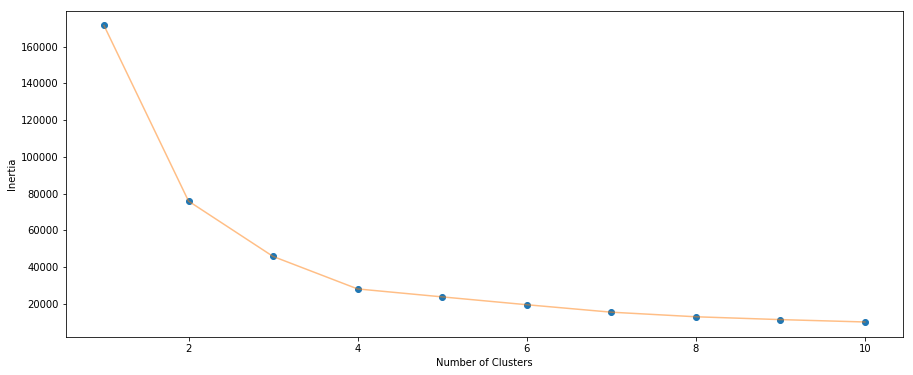

In [23]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [24]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [25]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

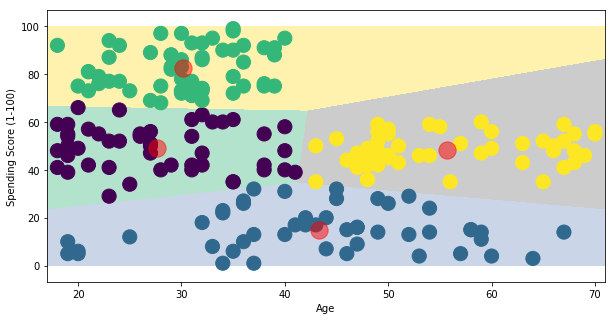

In [26]:
plt.figure(1 , figsize = (10 , 5) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()